In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def read_dataset(fname):
    # 指定索引
    data = pd.read_csv(fname, index_col=0) 
    data = data.reset_index()
    #猜測食物熱量
    data = data[['weight','Gender','sports','calories_chicken','calories_scone','tortilla_calories','turkey_calories','waffle_calories']]
    
    # 處理遺缺值
    data = data.dropna()
    # 指定索引
    data = data.reset_index(drop=True)
    return data

data = read_dataset('food_coded.csv')

data['weight']=data['weight'].astype(int)


def BMIStandard(data):
    if data["weight"]<135:
        data["weight_range"] = "first"
    else:
        data["weight_range"] = "second"
    return data
data=data.apply(BMIStandard,axis=1)
data

labels = data["weight_range"].unique().tolist()
data["weight_range"]=data["weight_range"].apply(lambda n: labels.index(n))

#描述性統計- data describe
def describe(df):
    df_des=df.describe(include='all',datetime_is_numeric=True)
    return df_des.round(2)
data_des = describe(data)
data_des

,weight,Gender,sports,calories_chicken,calories_scone,tortilla_calories,turkey_calories,waffle_calories,weight_range
count,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00
mean,159.11,1.39,1.39,582.06,510.59,952.06,561.72,1081.01,0.22
std,32.57,0.49,0.49,126.66,233.92,199.65,152.16,248.99,0.41
min,100.00,1.00,1.00,265.00,315.00,580.00,345.00,575.00,0.00
25%,135.00,1.00,1.00,430.00,420.00,725.00,500.00,900.00,0.00
50%,155.00,1.00,1.00,610.00,420.00,940.00,500.00,1315.00,0.00
75%,180.00,2.00,2.00,720.00,420.00,1165.00,690.00,1315.00,0.00
max,265.00,2.00,2.00,720.00,980.00,1165.00,850.00,1315.00,1.00


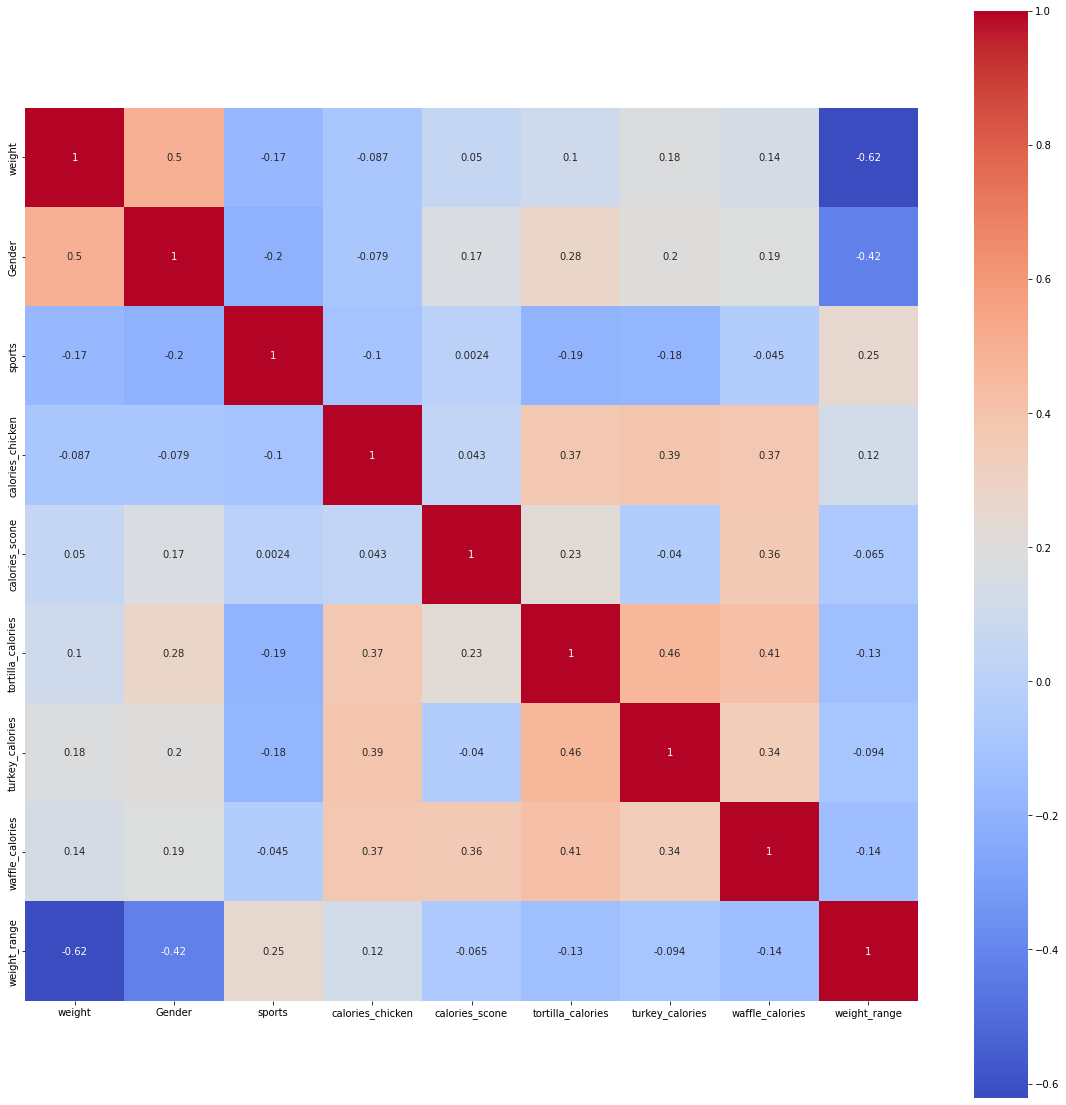

In [3]:
#計算correlation
#取特徵欄位
features_mean= list(data.columns)
# print(features_mean)

plt.figure(figsize=(20,20))
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [4]:
y = data['weight_range'].values
X = data.drop(['weight_range','weight'], axis=1).values

In [5]:
from sklearn.feature_selection import SelectPercentile, f_regression
selector = SelectPercentile(f_regression, percentile=20)
X_classif = selector.fit_transform(X, y)
print(X_classif.shape)

(119, 2)


In [6]:
#切割資料集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_classif, y, test_size=0.2)

In [7]:
print(X_train.shape)
print(X_test.shape)

(95, 2)
(24, 2)


In [8]:
#建立模型
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('train score: {train_score:.6f}; test score: {test_score:.6f}'.format(train_score=train_score, test_score=test_score))

train score: 0.800000; test score: 0.708333


In [9]:
#找尋建議的特徵
print(selector.get_support())
print(selector.pvalues_)

[ True  True False False False False False]
[2.01776260e-06 6.43625859e-03 1.92277538e-01 4.82019227e-01
 1.64602540e-01 3.09633611e-01 1.37138863e-01]


In [10]:
#測試資料集
y_pred=model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def polynomial_model(degree=1, **kwarg):
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    logistic_regression = LogisticRegression(**kwarg)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("logistic_regression", logistic_regression)])
    return pipeline

#如果要用L1，則solver必須為liblinear
# model = polynomial_model(degree=2, penalty='l1', solver='liblinear')
model = polynomial_model(degree=2, penalty='l2')

model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)
print('train_score: {0:0.6f}; cv_score: {1:.6f}'.format(train_score, cv_score))

train_score: 0.800000; cv_score: 0.708333


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def polynomial_model(degree=1, **kwarg):
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    logistic_regression = LogisticRegression(**kwarg)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("logistic_regression", logistic_regression)])
    return pipeline

#如果要用L1，則solver必須為liblinear
model = polynomial_model(degree=2, penalty='l1', solver='liblinear')
# model = polynomial_model(degree=2, penalty='l2')

model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)
print('train_score: {0:0.6f}; cv_score: {1:.6f}'.format(train_score, cv_score))

train_score: 0.800000; cv_score: 0.708333
